In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim, utils

import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
def save_images(tensor_images, path, name):
    size_images = tensor_images.shape[0]
    for i in range(size_images):
        torchvision.utils.save_image(tensor_images[i], path+name+'%d.png' %(i+1) )
    
    message = 'Se han guardado correctamente las imagenes de' + name +' en: ' + path
    print(message)
    
def image_viewer(train_loader):
    # shape of training data
    dataiter_train = iter(train_loader)
    images_train, labels_train = dataiter_train.next()

    print(images_train.shape)
    print(labels_train.shape)
    print(labels_train)
    
    fig = plt.figure(figsize=(25, 4))
    
    # visualizing the training images
    for idx in np.arange(20):
        ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
        plt.imshow(images_train[idx].permute(1, 2, 0))
        ax.set_title(classes[labels_train[idx].item()])
        
    return images_train, labels_train
    
def load_dataset1(data_dir):
    data_path = data_dir
    transform = transforms.Compose([
                              transforms.RandomRotation(10),
                              transforms.ToTensor()
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    loader1 = torch.utils.data.DataLoader(
        dataset,
        batch_size=1000,
        num_workers=0,
        shuffle=True
    )
    return loader1

def load_dataset2(data_dir):
    data_path = data_dir
    transform = transforms.Compose([
                              transforms.CenterCrop(10), # Recorta la imagen dada en el centro.
                              transforms.ToTensor()
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    loader2 = torch.utils.data.DataLoader(
        dataset,
        batch_size=1000,
        num_workers=0,
        shuffle=True
    )
    return loader2

def load_dataset3(data_dir):
    data_path = data_dir
    transform = transforms.Compose([
                              transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Transformación afín aleatoria de la imagen manteniendo el centro invariante
                              transforms.ToTensor()
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    loader3 = torch.utils.data.DataLoader(
        dataset,
        batch_size=1000,
        num_workers=0,
        shuffle=True
    )
    return loader3

def load_dataset4(data_dir):
    data_path = data_dir
    transform = transforms.Compose([
                              transforms.RandomCrop(32), # Recorta la imagen dada en una ubicación aleatoria.
                              transforms.ToTensor()
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    loader4 = torch.utils.data.DataLoader(
        dataset,
        batch_size=1000,
        num_workers=0,
        shuffle=True
    )
    return loader4

def load_dataset5(data_dir):
    data_path = data_dir
    transform = transforms.Compose([
                              transforms.RandomHorizontalFlip(1),
                              transforms.ToTensor()
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    loader5 = torch.utils.data.DataLoader(
        dataset,
        batch_size=1000,
        num_workers=0,
        shuffle=True
    )
    return loader5

def load_dataset6(data_dir):
    data_path = data_dir
    transform = transforms.Compose([
                              transforms.RandomVerticalFlip(1),
                              transforms.ToTensor()
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    
    loader6 = torch.utils.data.DataLoader(
        dataset,
        batch_size=1000,
        num_workers=0,
        shuffle=True
    )
    return loader6

In [5]:
data_dir="D:\\JCProjects\\DataCafe\\train\\"
path_to_save = "D:\\JCProjects\\DataCafe\\save\\"
classes = ('class1', 'class2', 'class3')

torch.Size([1000, 3, 200, 200])
torch.Size([1000])
tensor([2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1,
        1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0,
        0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0,
        1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0,
        2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2,
        2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2,
        2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2,
        0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1,
        2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0,
        1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2,
        1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0

Se han guardado correctamente las imagenes en: D:\JCProjects\DataCafe\save\
torch.Size([1000, 3, 32, 32])
torch.Size([1000])
tensor([0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1,
        0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2,
        1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2,
        0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0,
        1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
        0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1,
        0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1,
        0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2

Se han guardado correctamente las imagenes en: D:\JCProjects\DataCafe\save\


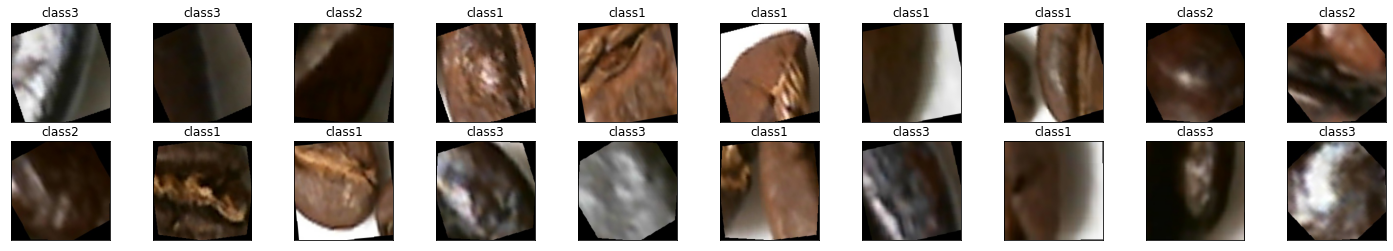

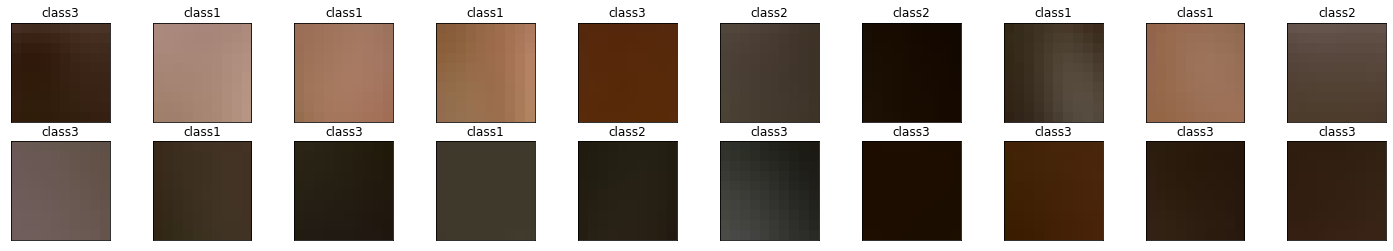

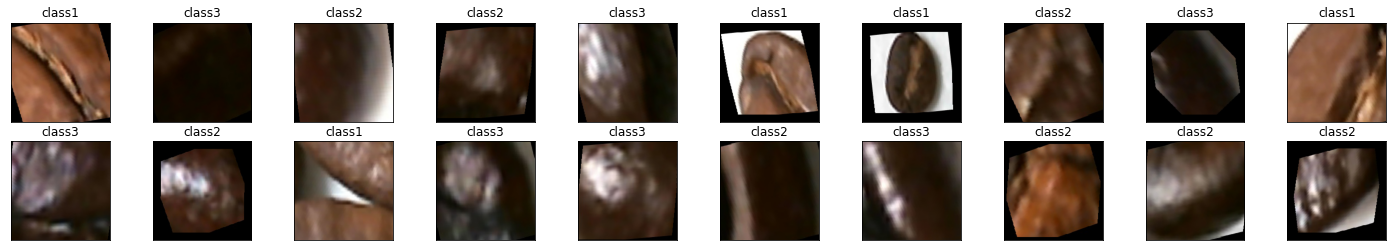

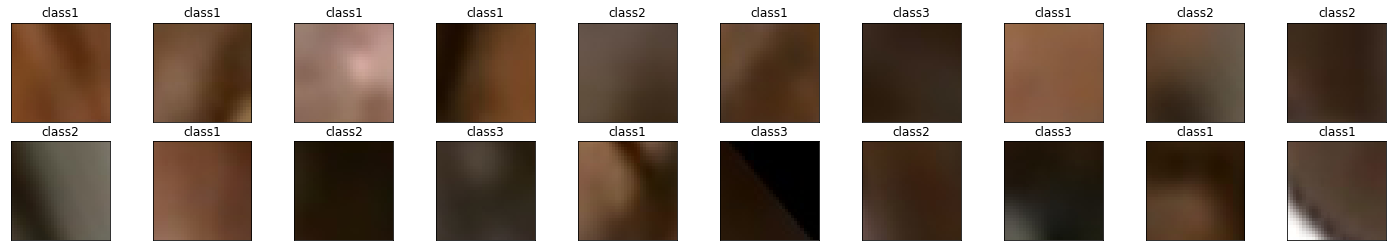

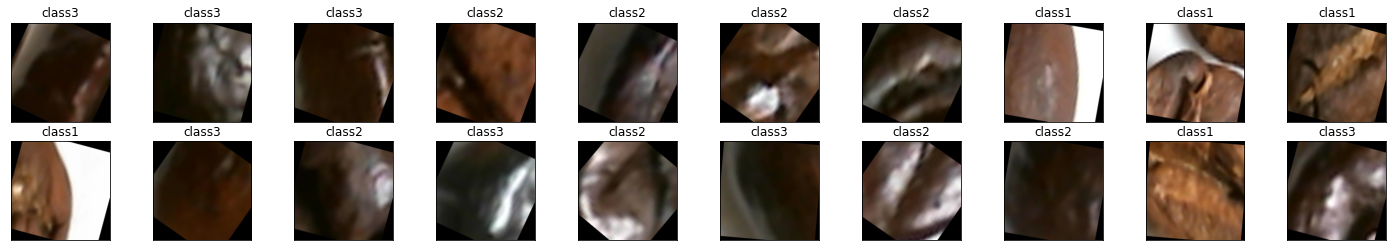

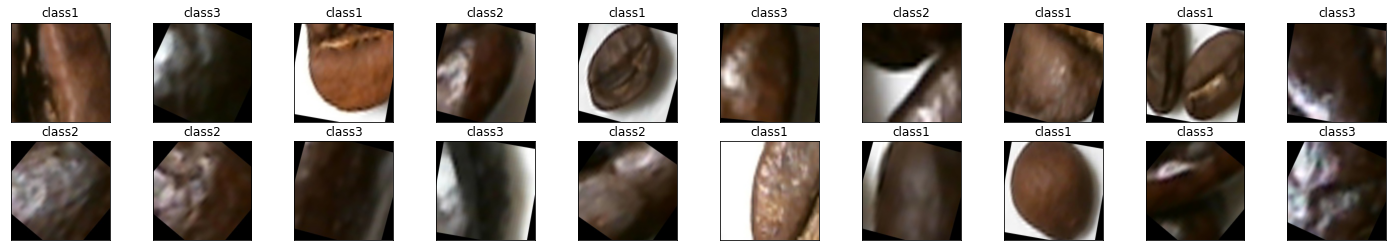

In [6]:
# defining trainloader and testloader Augmentation
train_loader1 = load_dataset1(data_dir) # Random Rotation

train_loader2 = load_dataset2(data_dir) # Center Crop

train_loader3 = load_dataset3(data_dir) # Random Affine Tranformation

train_loader4 = load_dataset4(data_dir) # Random Crop

train_loader5 = load_dataset5(data_dir) # Horizontal Flip

train_loader6 = load_dataset6(data_dir) # Vertical Flip


# 1
images_train1, labels_train1 = image_viewer(train_loader1)
save_images(images_train1, path_to_save, 'random_rotation')

# 2
images_train2, labels_train2 = image_viewer(train_loader2)
save_images(images_train2, path_to_save, 'center_crop')

#3
images_train3, labels_train3 = image_viewer(train_loader3)
save_images(images_train3, path_to_save, 'random_affine')

#4
images_train4, labels_train4 = image_viewer(train_loader4)
save_images(images_train4, path_to_save, 'random_crop')

#5
images_train5, labels_train5 = image_viewer(train_loader5)
save_images(images_train5, path_to_save, 'horizontal_flip')

#6
images_train6, labels_train6 = image_viewer(train_loader6)
save_images(images_train6, path_to_save, 'vertical_flip')